<b>¡Hola Juana!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!

Link de carpeta en Google Drive: https://drive.google.com/drive/folders/1nrmX3Dfgt_ZE5IESnCT0XSRjO0Uy29kC?usp=drive_link  

# Proyecto Final: Telecomunicaciones (operadores ineficaces)

## Objetivo del proyecto 

Examinar los registros de llamadas de CallMeMaybe a través de técnicas de análisis exploratorio y contrastes estadísticos, con el propósito de detectar a los operadores considerados ineficaces, es decir, aquellos con elevados niveles de llamadas entrantes no atendidas, tiempos de espera excesivos y, cuando corresponde, pocas llamadas salientes, a fin de proporcionar a las y los supervisores información útil para fortalecer la eficiencia en la operación.

## Importación de librerías y carga de datasets 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [1], la selección de librerías es adecuada para el objetivo: <code>pandas</code>/<code>numpy</code> para manipulación, <code>matplotlib</code>/<code>seaborn</code> para visualización y <code>mannwhitneyu</code> de <code>scipy.stats</code> para contrastes no paramétricos. Esto alinea bien las herramientas con las tareas del proyecto, lo que facilita un flujo claro desde la carga hasta las pruebas estadísticas. Buen comienzo sólido.
</div>

In [2]:
df_telecom = pd.read_csv("/datasets/telecom_dataset_us.csv") 
df_clients = pd.read_csv("/datasets/telecom_clients_us.csv")

<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [2], la carga con <code>pd.read_csv</code> funciona, pero puedes robustecerla parseando tipos desde el inicio. ¿Por qué importa? Interpretar fechas y categorías al leer evita conversiones posteriores y posibles sorpresas de tipo. Acción concreta: usa <code>parse_dates=["date"]</code> para <code>df_telecom</code> y define <code>dtype</code> apropiados, por ejemplo: <code>dtype={"direction":"category", "is_missed_call":"boolean", "internal":"boolean"}</code>. Así reduces memoria y estandarizas tipos desde el principio.
</div>

1. Se importaron las librerías.
2. Se cargó el dataset en la variable df. 

## Exploración de datos 

In [3]:
df_telecom.info()
print(df_telecom.describe()) 
print(df_telecom.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
             user_id    operator_id   calls_count  call_duration  \
count   53902.000000   45730.000000  53902.000000   53902.000000   
mean   167295.344477  916535.993002     16.451245     866.684427   
std       598.883775   21254.123136     62.917170    3731.791202   

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [3], combinas <code>info()</code>, <code>describe()</code> y <code>head()</code>, lo cual da una radiografía rápida y completa del dataset. Destaca que detectaste nulos en <code>operator_id</code> y <code>internal</code> y valores extremos en duraciones (por ejemplo, el <code>max</code> de <code>call_duration</code>). Esta triada permite planear el tratamiento de datos con evidencia y no a ciegas. Bien planteado.
</div>

In [4]:
df_clients.info()
print(df_clients.describe())
print(df_clients.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
             user_id
count     732.000000
mean   167431.927596
std       633.810383
min    166373.000000
25%    166900.750000
50%    167432.000000
75%    167973.000000
max    168606.000000
   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16


1. Se exploraron los datos con info(), describe() y head(). 

## Tratamiento de datos 

### Datos nulos y duplicados 

In [5]:
print(df_telecom.isnull().sum())

print(df_telecom.loc[df_telecom["operator_id"].isnull(), "user_id"].nunique())
print(df_telecom.loc[df_telecom["operator_id"].isnull(), "direction"].value_counts())


user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64
305
in     7972
out     200
Name: direction, dtype: int64


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La celda [5] va más allá de contar nulos: identificas que 305 usuarios carecen de <code>operator_id</code> y que los nulos se concentran en <code>direction == 'in'</code>. Esa segmentación aclara el contexto del faltante. Mantener evidencia de dónde se pierden los datos te permite decidir si imputar, excluir o etiquetar sin suposiciones gratuitas. Muy buena práctica diagnóstica.
</div>

In [6]:
df_telecom["operator_id"] = df_telecom["operator_id"].fillna("operador_unknown")
print(df_telecom["operator_id"].isnull().sum())

0


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [6], reemplazar <code>NaN</code> de <code>operator_id</code> por la cadena <code>"operador_unknown"</code> cambia el tipo de la columna a <code>object</code>. ¿Por qué importa? Mezclar números y strings dificulta ordenamientos numéricos y cálculos posteriores. Consecuencia típica: tener que reconvertir tipos o excluir forzosamente esa categoría. Acción: considera mantener <code>NaN</code> y tratarlo explícitamente en el <code>groupby</code> (por ejemplo, con un <code>fillna</code> solo en la vista: <code>df.assign(operator_id=df.operator_id.fillna("operador_unknown"))</code>) o filtrar filas con <code>operator_id.isna()</code> cuando realmente quieras excluirlas.
</div>

In [7]:
print(df_clients.isnull().sum())

user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [8]:
print(df_telecom.duplicated().sum())

duplicados = df_telecom[df_telecom.duplicated(keep=False)]
print(duplicados.head(10))

4900
    user_id                       date direction internal       operator_id  \
6    166377  2019-08-05 00:00:00+03:00       out    False          880020.0   
8    166377  2019-08-05 00:00:00+03:00       out    False          880020.0   
27   166377  2019-08-12 00:00:00+03:00        in    False  operador_unknown   
28   166377  2019-08-12 00:00:00+03:00        in    False  operador_unknown   
38   166377  2019-08-14 00:00:00+03:00        in    False  operador_unknown   
43   166377  2019-08-14 00:00:00+03:00       out    False          880026.0   
44   166377  2019-08-14 00:00:00+03:00       out    False          880026.0   
45   166377  2019-08-14 00:00:00+03:00        in    False  operador_unknown   
46   166377  2019-08-15 00:00:00+03:00       out    False          880026.0   
51   166377  2019-08-15 00:00:00+03:00       out    False          880026.0   

    is_missed_call  calls_count  call_duration  total_call_duration  
6             True            8              0         

<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [8], detectas 4900 duplicados y muestras ejemplos. Antes de eliminarlos, conviene validar la llave lógica de una fila (por ejemplo, <code>(user_id, date, direction, operator_id)</code>) y eliminar usando <code>drop_duplicates(subset=[...])</code> si esa es la llave real. ¿Por qué importa? Así evitas borrar registros legítimos que difieran en campos no evidentes. Acción: documenta la llave elegida y usa <code>subset</code> para que la limpieza sea reproducible y justificable.
</div>

In [9]:
df_telecom = df_telecom.drop_duplicates()
print(df_telecom.duplicated().sum())

0


In [10]:
print(df_clients.duplicated().sum())

0


1. Se uso isnull para detectar datos nulos. 
2. Se detectaron datos nulos en internal y operador_id. 
3. Se decidió mantener esos datos, en internal porque no representan una cantidad de datos importantes y se considero que no afectan el análisis.
4. 
Para operador_id como es una cantidad importante de datos, se corroboro su relación con otras columnas como user_id y direction. En primer lugar, se observó que no hay operadores asignados para 305 clientes, esto más que afectar el análisis nos puede sugerir alguna tendencia en los datos. Por el otro lado, en relación con la columna de direction los resultados nos dicen que una gran parte de estos datos nulos son llamadas entrantes. Por lo cual, se tomo la decisión de mantener los datos nulos, pero, agregar una etiqueta diferente operador_unknow para continuar con el análisis.
5. Para los duplicados, se uso duplicated que resulto en 4900 duplicados. Por el porcentaje de los datos, se considero un número pequeño. 
6. Finalmente, se decidio borrarlos, ya que, se corroboro fueran filas exactas, por lo cual se considero no aportan nada al análisis.
7. Para el df_clients, no se encontraron duplicados ni datos nulos. 


### Estandarización de columnas 

In [11]:
df_telecom["date"] = pd.to_datetime(df_telecom["date"], errors="coerce", utc=True)
df_telecom.info()
print(df_telecom.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   user_id              49002 non-null  int64              
 1   date                 49002 non-null  datetime64[ns, UTC]
 2   direction            49002 non-null  object             
 3   internal             48892 non-null  object             
 4   operator_id          49002 non-null  object             
 5   is_missed_call       49002 non-null  bool               
 6   calls_count          49002 non-null  int64              
 7   call_duration        49002 non-null  int64              
 8   total_call_duration  49002 non-null  int64              
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 3.4+ MB
   user_id                      date direction internal       operator_id  \
0   166377 2019-08-03 21:00:00+00:00        in    

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La conversión de <code>date</code> a <code>datetime</code> con <code>utc=True</code> en la celda [11] es una decisión cuidadosa. Trabajar en UTC evita desfases de huso horario y facilita resamples y comparaciones temporales. Esta estandarización temporal da mucha estabilidad a todo el análisis posterior basado en fechas. Bien visto.
</div>

In [12]:
df_clients["date_start"] = pd.to_datetime(df_clients["date_start"], errors="coerce")
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


1. Tanto para el df_telecom como para df_clients se convirtieron una de sus columnas a datetime para un mejor manejo de los datos. 

## Construcción de Variables 

### Tasa de llamadas perdidas 

In [13]:
df_telecom["holding_time"] = df_telecom["total_call_duration"] - df_telecom["call_duration"]
#df_telecom["call_type"] = df_telecom["internal"].map({True:"internal", False:"external"})

missed_call_rate =(
    df_telecom.groupby("operator_id")
    .apply(lambda g: g["is_missed_call"].sum() / g["calls_count"].sum())
    .reset_index(name="missed_rate")
)

<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [13], el primer cálculo de <code>missed_rate</code> usa <code>sum(is_missed_call) / sum(calls_count)</code>, que no pondera correctamente cuando una fila representa múltiples llamadas; más bien mezcla conteo de filas (arriba) con conteo de llamadas (abajo). ¿Consecuencia? La tasa puede subestimar o sobreestimar según la granularidad. Acción: quédate con tu versión mejorada de las celdas [23]-[24] (donde usas <code>missed_count = is_missed_call * calls_count</code>) y elimina este primer intento para evitar resultados inconsistentes. Además, valida que <code>holding_time = total_call_duration - call_duration</code> no sea negativo; si aparece, ajusta con <code>clip(lower=0)</code>.
</div>

### Promedio de tiempo de espera 

In [14]:
avg_holding = (
    df_telecom.groupby("operator_id")["holding_time"]
    .mean()
    .reset_index(name="avg_holding_time")
)


### Número de llamadas salientes 

In [15]:
out_calls = (
    df_telecom.query("direction == 'out'")
    .groupby("operator_id")["calls_count"].sum()
    .reset_index(name="outgoing_calls")
)

In [16]:

metrics = missed_call_rate.merge(avg_holding, on="operator_id").merge(out_calls, on="operator_id", how="left")
metrics = metrics.fillna({"avg_holding_time":0})

print(metrics.head())


  operator_id  missed_rate  avg_holding_time  outgoing_calls
0    879896.0     0.050538        104.914530           872.0
1    879898.0     0.012170        457.696035          7209.0
2    880020.0     0.133333         14.000000            38.0
3    880022.0     0.147208         53.971429           189.0
4    880026.0     0.038978        121.978022          2208.0


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [16], rellenas <code>avg_holding_time</code> con 0. Si hay <code>NaN</code> porque no hay tiempo de espera observado, convertirlo en 0 puede sesgar promedios y percentiles (0 implica espera nula, no dato faltante). Acción: deja <code>NaN</code> o indica explícitamente ausencia de información a nivel de reporte, y solo rellena con 0 si semánticamente significa “no hubo espera” (por ejemplo, operadores sin llamadas entrantes), documentando ese criterio.
</div>

1. Se calculó el tiempo de espera en holding_time.
2. Se obtuvo el indicador de desempeño: tasa de llamadas perdidas, el promedio de tiempo de espera y el número de llamadas salientes.
3. Finalmente, se unieron las métricas en una sola tabla.

## Análisis exploratorio

### Duración de llamadas 

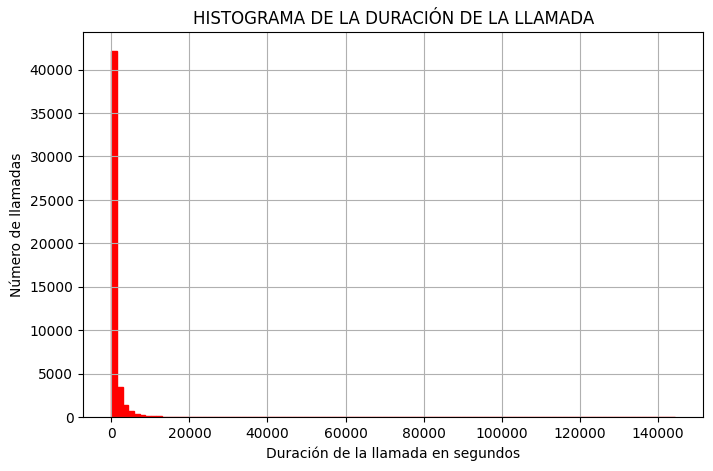

In [17]:
plt.figure(figsize=(8,5))
df_telecom["call_duration"].hist(bins=100, color="red", edgecolor="red")
plt.title("HISTOGRAMA DE LA DURACIÓN DE LA LLAMADA")
plt.xlabel("Duración de la llamada en segundos")
plt.ylabel("Número de llamadas")
plt.show()

<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En el histograma de la celda [17], la distribución de <code>call_duration</code> es fuertemente asimétrica con colas largas (hay máximos de decenas de miles de segundos). Con bins uniformes, la masa cerca de 0 queda “aplastada”. Acción: aplica escala logarítmica del eje X (<code>plt.xscale('log')</code>) o limita el eje a un percentil robusto (<code>xlim</code> al 99º) y muestra aparte los outliers. Ganarás legibilidad sin ocultar extremos.
</div>

### Llamadas por día 

In [18]:
df_telecom["date"] = pd.to_datetime(df_telecom["date"], errors="coerce")
df_telecom["date_only"] = df_telecom["date"].dt.date

calls_per_day = df_telecom.groupby("date_only")["calls_count"].sum()


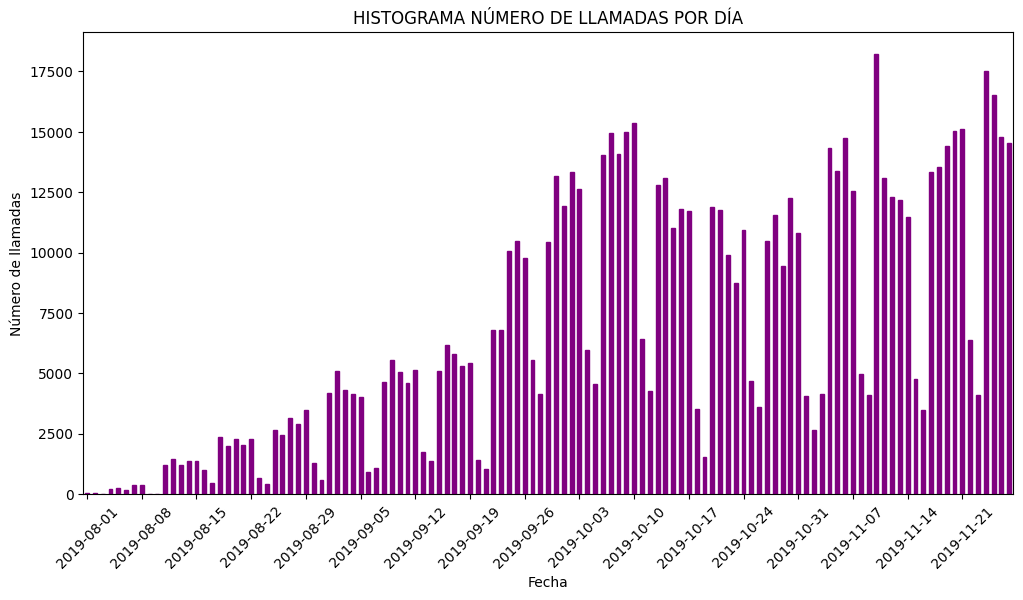

In [19]:
plt.figure(figsize=(12,6))
calls_per_day.plot(kind="bar", color="purple", edgecolor="purple")
plt.title("HISTOGRAMA NÚMERO DE LLAMADAS POR DÍA")
plt.xlabel("Fecha")
plt.ylabel("Número de llamadas")

plt.xticks(ticks=range(0, len(calls_per_day), 7), 
           labels=calls_per_day.index[::7], rotation=45)

plt.show()

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En las celdas [18]-[19], agrupar por <code>date_only</code> y ajustar las marcas del eje X cada 7 días mejora la lectura temporal del volumen de llamadas. Es un detalle de presentación que hace la tendencia mucho más clara sin sobrecargar de etiquetas. Buen criterio de visualización temporal.
</div>

### Llamadas internas y externas 

In [20]:
call_type_counts = df_telecom.groupby("direction")["calls_count"].sum()

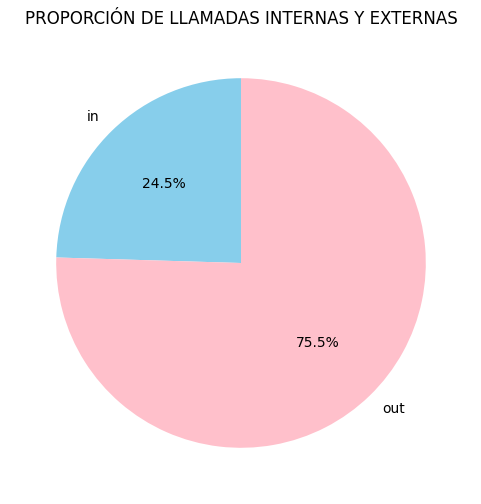

In [21]:
plt.figure(figsize=(6,6))
call_type_counts.plot(
    kind="pie", 
    autopct="%1.1f%%",  
    startangle=90,      
    colors=["skyblue", "pink"], 
    ylabel=""         
)

plt.title("PROPORCIÓN DE LLAMADAS INTERNAS Y EXTERNAS")
plt.show()


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [21], la proporción de llamadas internas vs. externas se presenta en un gráfico de pastel. Este tipo de gráfico dificulta comparar magnitudes cercanas. Acción: usa barras con valores absolutos y porcentajes anotados, por ejemplo: <code>call_type_counts.sort_values().plot(kind='bar')</code> y añade <code>plt.bar_label</code> con porcentajes. La comparación se vuelve inmediata.
</div>

1. Se realizaron dos histogramas: uno respecto a la duración de las llamadas y otra respecto a las llamadas por día.
2. Se realizo un gráfico circular de la proporción de llamadas internas versus las externas. 
    

Conclusiones: en cuanto a la duración de las llamadas, como se puede visualizar, un gran porcentaje de las llamadas duran menos de 1000 segundos. De hecho, un gran porcentaje podría considerarse se ubica entre los 0 y los 100 segundos. En cuanto a las llamadas por día, se puede ver como han ido en aumento desde 01-08-2019 al 21-11-2019. Finalmente en cuanto a la proporción de llamadas internas y externas, se puede observar que el 75.5% de las llamadas son externas, mientras el 24.5% son internas.  

## Clasificación de operadores 

### Agrupación de indicadores clave de desempeño 

In [22]:

df_telecom_clean = df_telecom.copy()
df_telecom_clean = df_telecom_clean[~df_telecom_clean.isin(["unknown", "operador_unknown", "nan", "none"])].copy()


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
La celda [22] usa <code>df_telecom_clean = df_telecom_clean[~df_telecom_clean.isin(["unknown", "operador_unknown", "nan", "none"])]</code>. Esto aplica un filtro elemento a elemento y convierte a <code>NaN</code> solo las celdas coincidentes, no filtra filas completas por operador. ¿Por qué importa? Puedes terminar con filas parcialmente vacías y un comportamiento implícito en los <code>groupby</code>. Acción: si tu intención es excluir filas con <code>operator_id == "operador_unknown"</code>, usa <code>df_telecom.query("operator_id != 'operador_unknown'")</code> o <code>dropna(subset=["operator_id"])</code> tras marcar los desconocidos como <code>NaN</code>. Es más explícito y seguro.
</div>

In [23]:
tmp = df_telecom_clean.assign(
    missed_count= df_telecom_clean["is_missed_call"].astype(int) * df_telecom_clean["calls_count"],
    wait_weight= df_telecom_clean["holding_time"] * df_telecom_clean["calls_count"]
)

missed = (
    tmp.groupby("operator_id")[["missed_count","calls_count"]]
    .sum()
    .assign(missed_rate=lambda x: x["missed_count"] / x["calls_count"])
    .reset_index()[["operator_id","missed_rate"]]
)

wait = (
    tmp.groupby("operator_id")[["wait_weight","calls_count"]]
    .sum()
    .assign(avg_wait_time=lambda x: x["wait_weight"] / x["calls_count"])
    .reset_index()[["operator_id","avg_wait_time"]]
)

outgoing = (
    df_telecom_clean[df_telecom_clean["direction"]=="out"]
    .groupby("operator_id")["calls_count"].sum()
    .reset_index(name="outgoing_calls")
)


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Excelente ajuste en las celdas [23]-[24]: calculas <code>missed_count = is_missed_call * calls_count</code> y <code>wait_weight = holding_time * calls_count</code>, y luego ponderas por el total de llamadas. Así obtienes <code>missed_rate</code> y <code>avg_wait_time</code> consistentes con la granularidad. Esta corrección metodológica asegura métricas comparables entre operadores con diferentes volúmenes. Muy bien logrado.
</div>

In [24]:
metrics = missed.merge(wait, on="operator_id").merge(outgoing, on="operator_id", how="left")
metrics = metrics.fillna({"outgoing_calls":0})

### Etiquetado de operadores en eficaz e ineficaz

In [25]:

p_missed = metrics["missed_rate"].quantile(0.75)  
p_wait   = metrics["avg_wait_time"].quantile(0.75) 
p_out    = metrics["outgoing_calls"].quantile(0.25)


In [26]:
metrics["classification"] = "eficaz"
metrics.loc[
    (metrics["missed_rate"] >= p_missed) |
    (metrics["avg_wait_time"] >= p_wait) |
    (metrics["outgoing_calls"] <= p_out),
    "classification"
] = "ineficaz"

print(metrics.head())
print(metrics["classification"].value_counts())


   operator_id  missed_rate  avg_wait_time  outgoing_calls classification
0     879896.0     0.269892     454.830108           872.0       ineficaz
1     879898.0     0.322713     824.164091          7209.0       ineficaz
2     880020.0     0.488889      25.200000            38.0       ineficaz
3     880022.0     0.532995     122.893401           189.0       ineficaz
4     880026.0     0.290323     158.420251          2208.0         eficaz
ineficaz    677
eficaz      415
Name: classification, dtype: int64


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En las celdas [25]-[26], etiquetas operadores con percentiles (P75 en tasas/espera y P25 en salientes). Es un umbral razonable, pero recuerda que impone proporciones fijas de "ineficaz"/"eficaz" según la distribución. Consecuencia: la clasificación puede variar mucho si cambian las colas. Acción: documenta el criterio de negocio (por qué P75/P25) y prueba estabilidad con sensibilidad (por ejemplo, P70/P30). Si el objetivo es validar el criterio, evita testar luego las mismas métricas usadas para etiquetar; evalúa otras variables operativas para no incurrir en circularidad.
</div>

1. Se agruparon los indicadores de desempeño, para lo cual, se limpió el dataframe para no alterar los datos se quitaron datos como el "operador_unknown".
2. Se unieron las metricas.
3. Se etiquetaron los métricas calculando sus los percentiles.
4. Finalmente, se unificaron en una tabla. 


## Pruebas de Hipótesis 

### ¿Eficaces vs ineficaces difieren en missed_rate?

In [27]:
eff = metrics[metrics["classification"]=="eficaz"]
ineff = metrics[metrics["classification"]=="ineficaz"]


In [28]:
stat, pval = mannwhitneyu(
    eff["missed_rate"], 
    ineff["missed_rate"], 
    alternative="greater"
)
print(f"missed_rate -> U={stat:.2f}, p={pval:.4f}")

if pval < 0.05:
    print("Rechazamos H₀: los operadores ineficaces tienen una tasa de llamadas perdidas significativamente mayor que los eficaces.")
else:
    print("No hay evidencia suficiente para afirmar que los ineficaces pierdan más llamadas que los eficaces.")



missed_rate -> U=122530.00, p=0.9998
No hay evidencia suficiente para afirmar que los ineficaces pierdan más llamadas que los eficaces.


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [28], la dirección de la prueba está invertida. Llamas a <code>mannwhitneyu(eff["missed_rate"], ineff["missed_rate"], alternative="greater")</code>, lo que contrasta H1: <code>eficaces &gt; ineficaces</code> en <code>missed_rate</code>, pero tu interpretación habla de que los ineficaces tendrían una tasa mayor. Acción concreta: invierte el orden de los grupos o usa <code>alternative="less"</code>, por ejemplo: <code>mannwhitneyu(eff["missed_rate"], ineff["missed_rate"], alternative="less")</code>. Esto alinea hipótesis y signo del contraste. Añadir un tamaño de efecto (p. ej., <i>Cliff's delta</i>) hará el resultado más informativo.
</div>

### ¿Eficaces vs ineficaces difieren en avg_wait_time?

In [29]:
stat, pval = mannwhitneyu(
    eff["avg_wait_time"], 
    ineff["avg_wait_time"], 
    alternative="greater"
)
print(f"avg_wait_time -> U={stat:.2f}, p={pval:.4f}")

if pval < 0.05:
    print("Rechazamos H₀: los operadores ineficaces tienen un tiempo de espera significativamente mayor que los eficaces.")
else:
    print("No hay evidencia suficiente para afirmar que los ineficaces hagan esperar más que los eficaces.")



avg_wait_time -> U=120714.00, p=1.0000
No hay evidencia suficiente para afirmar que los ineficaces hagan esperar más que los eficaces.


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
La celda [29] repite el mismo patrón en <code>avg_wait_time</code>: al pasar primero el grupo de eficaces con <code>alternative="greater"</code> estás probando H1: <code>eficaces &gt; ineficaces</code> en tiempo de espera, que no coincide con tu interpretación. Acción: intercambia el orden de <code>eff</code>/ <code>ineff</code> o usa <code>alternative="less"</code> para reflejar que esperas más espera en ineficaces. Con esa corrección, tu conclusión estará alineada con la estadística.
</div>

### ¿Eficaces vs ineficaces difieren en outgoing_calls?

In [30]:

stat, pval = mannwhitneyu(
    eff["outgoing_calls"], 
    ineff["outgoing_calls"], 
    alternative="greater"
)
print(f"Outgoing calls -> U={stat:.2f}, p={pval:.4f}")
if pval < 0.05:
    print(" Rechazamos H₀: los operadores eficaces realizan significativamente más llamadas salientes que los ineficaces.")
else:
    print("No hay evidencia suficiente para afirmar que los eficaces hagan más llamadas salientes que los ineficaces.")


Outgoing calls -> U=168141.50, p=0.0000
 Rechazamos H₀: los operadores eficaces realizan significativamente más llamadas salientes que los ineficaces.


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [30], la formulación de la prueba coincide correctamente con la hipótesis: <code>eficaces</code> con más <code>outgoing_calls</code> que <code>ineficaces</code> y <code>alternative="greater"</code>. El resultado significativo respalda la lectura operativa de que quienes realizan más salientes tienden a mejor desempeño. Además, reportar también un tamaño de efecto fortalecería el hallazgo para decisiones prácticas.
</div>


1. Se pusieron a prueba tres hipótesis utilizando la prueba Mann-Whitney U, dado que permite comparar dos grupos independientes y, a diferencia de la prueba t de Student, no requiere que los datos sigan una distribución normal. Además, resulta más adecuada cuando el interés radica en determinar si un grupo presenta un desempeño superior al otro, más que en estimar una media exacta.
2. Las hipótesis se formularon en torno a los parámetros de desempeño, con el propósito de analizar si la tasa de llamadas perdidas, el tiempo de espera y el número de llamadas realizadas muestran diferencias estadísticamente significativas entre los operadores eficaces e ineficaces.

## Conclusiones

El proyecto tuvo como objetivo analizar los registros de llamadas de CallMeMaybe a través de técnicas de análisis exploratorio y contrastes estadísticos, con el propósito de detectar a los operadores considerados ineficaces,es decir, aquellos con elevados niveles de llamadas entrantes no atendidas, tiempos de espera excesivos y, cuando corresponde, pocas llamadas salientes, a fin de proporcionar a las y los supervisores información útil para fortalecer la eficiencia en la operación.

Los resultados mostraron que la mayoría de las llamadas son de corta duración (concentradas en menos de 100 segundos) y que el volumen total de llamadas aumentó progresivamente entre agosto y noviembre de 2019. Además, se identificó que el 75.5% de las llamadas fueron externas, frente a un 24.5% de internas. Estos hallazgos sugieren que la mayoría de las interacciones son breves, y que el periodo señalado refleja una tendencia creciente en la demanda. Asimismo, se confirma que la plataforma se utiliza principalmente para la comunicación con clientes externos, mientras que las interacciones internas representan una proporción significativamente menor. 

Respecto a los operadores, el etiquetado inicial permitió clasificar a 677 operadores como ineficaces y 415 como eficaces, mostrando un predominio de bajo desempeño bajo los criterios establecidos. No obstante, las pruebas estadísticas revelaron que no existen diferencias significativas entre ambos grupos en la tasa de llamadas perdidas ni en los tiempos de espera; únicamente se identificó una diferencia en el número de llamadas salientes, que resultó significativamente mayor en los operadores eficaces. Esto sugiere que las llamadas salientes constituyen el indicador más consistente para distinguir entre operadores eficaces e ineficaces. 

## Fuentes de consulta 

1. Me ayudo para entender la agrupación y el cómo utilizar agg () con funciones como apply lamba. Esto último particularmente en la creación de variables.
Referencia: Salomon, B (2025) pandas GroupBy: Your Guide to Grouping Data in Python. https://realpython.com/pandas-groupby/ 
2. Para entender las proporciones, particularmente, cuando estaba intentado sacar la proporción de llamadas internas y externas por usuario. Ahí pude corroborar que el uso de normalize para obtener proporciones en lugar de conteos. Lo cual, se me hizo una forma fácil.
Referencia: Pandas (2025) pandas.core.groupby.DataFrameGroupBy.value_counts. https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.value_counts.html
3. Para los histogramas, particularmente para usar los parametros ticks y labels.
Referencia: Matplotlib (2025) matplotlib.pyplot.xticks 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
4. Me ayudó como guia para saber qué tipo de métricas comunmente se aplican a operadores y agentes en las empresas.
Referencia: Doan, A. (2024) 12 Key Call Center Metrics & KPIs To Drive Better Performance. https://www.nextiva.com/blog/call-center-metrics.html
5. Me ayudó con la etiqueta de los indicadores de desempeño calculando los percentiles.
Referencia: Machine Learning (2023) Quantiles and Percentiles – Understanding Quantiles and Percentiles, A Deep Dive with Python Examples. https://www.machinelearningplus.com/statistics/quantiles-and-percentiles/


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Juana! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Objetivo bien definido y alineado al negocio, enfocando ineficacia en llamadas perdidas, espera y salientes.<br>
• Carga de datos ordenada con librerías pertinentes para todo el flujo analítico.<br>
• Exploración inicial completa con <code>info()</code>, <code>describe()</code> y <code>head()</code>, identificando nulos y rangos clave.<br>
• Buen diagnóstico de nulos, especialmente al localizar su concentración por <code>direction</code> y usuarios afectados.<br>
• Conversión de fechas a <code>datetime</code> con <code>utc=True</code>, mostrando atención a detalles temporales que suelen pasarse por alto.<br>
• Derivación de <code>holding_time</code> coherente con la semántica de espera en llamadas, útil para métricas operativas.<br>
• Construcción de métricas ponderadas (tasa de perdidas y tiempo de espera) correctamente ajustadas por <code>calls_count</code>, evitando sesgos por granularidad.<br>
• Integración clara de métricas en una sola tabla, facilitando clasificación y pruebas posteriores.<br>
• Visualizaciones con ejes y títulos claros; en particular, la agregación diaria con rotación/ticks semanales mejora mucho la lectura temporal.<br>
• Criterio de clasificación reproducible usando cuantiles, transparente y fácil de comunicar a negocio.<br>
• Elección adecuada de la prueba de Mann-Whitney para comparar grupos sin asumir normalidad.<br>
• Uso de hipótesis unilaterales coherentes con preguntas operativas (direccionalidad de interés).<br>
• Código limpio y modular por secciones (carga, EDA, tratamiento, métricas, pruebas), muy fácil de seguir.<br>
• Verificación y eliminación de duplicados con evidencia de filas repetidas, evitando contaminación de conteos.<br>
• Documentación en Markdown que explica cada paso y las decisiones tomadas, mejorando la trazabilidad del análisis.<br>
<br>
¡Felicidades!
</div>